Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [11]:
df = pd.read_csv(r"C:\Users\bootcamp\week5\day1/amz_uk_price_prediction_dataset.csv")

In [12]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
df.shape

(2443651, 9)

In [14]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

# Part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [15]:
# 1.1 Generate a frequency table for the product category
freq_table = df['category'].value_counts().reset_index()
freq_table.columns = ['category', 'Frequency']
print(freq_table)

                                   category  Frequency
0                         Sports & Outdoors     836265
1                                    Beauty      19312
2    Handmade Clothing, Shoes & Accessories      19229
3                               Bath & Body      19092
4                            Birthday Gifts      18978
..                                      ...        ...
291                       Motorbike Chassis        107
292                  Alexa Built-In Devices        107
293                                   Plugs        107
294          Smart Home Security & Lighting        104
295                          Smart Speakers         54

[296 rows x 2 columns]


In [16]:
# 1.2 Which are the top 5 most listed product categories?
top5 = df['category'].value_counts().head(5)
print(top5)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [17]:
# The top 5 most listed product categories are: Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts.                                        

In [18]:
# 2.1 Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.


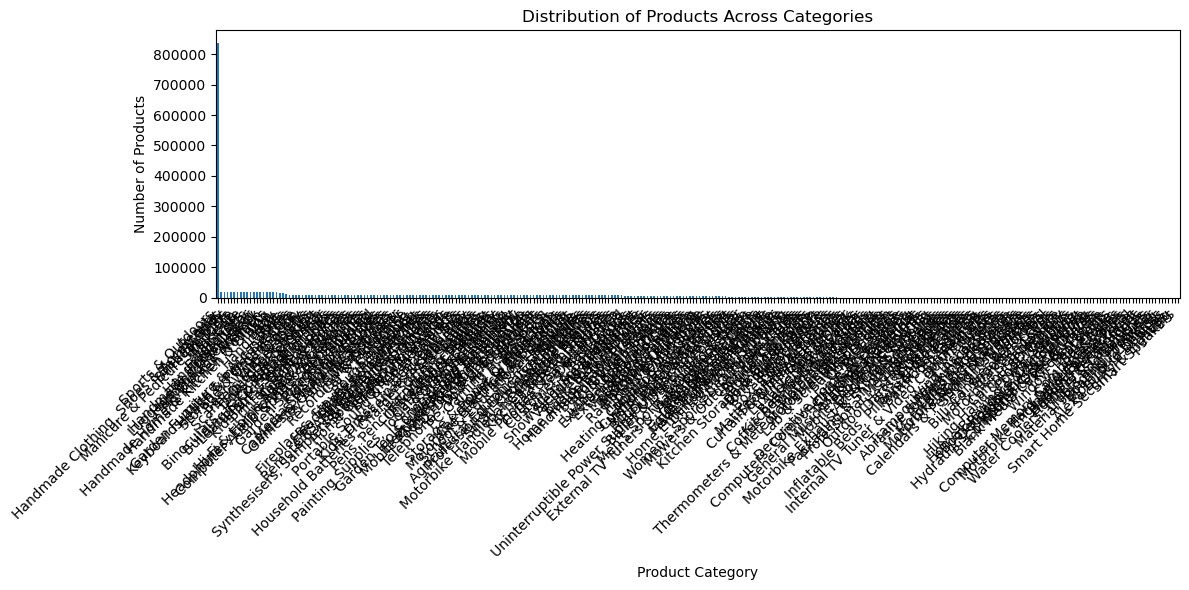

In [19]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

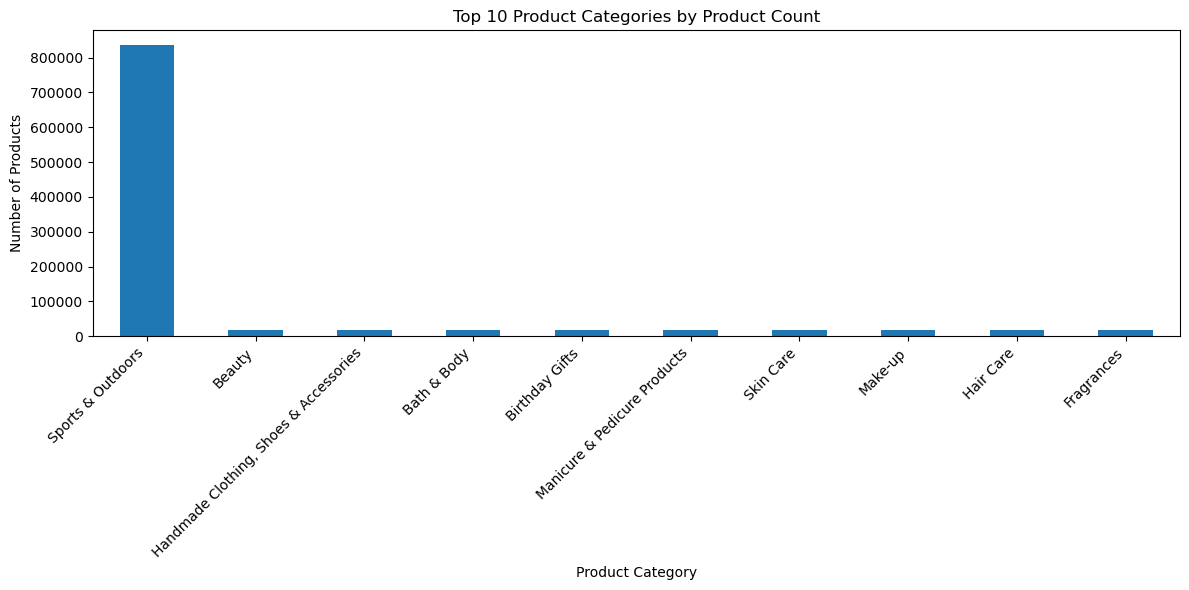

In [20]:
top10_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top10_categories.plot(kind='bar')
plt.title('Top 10 Product Categories by Product Count')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# 2.1 For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

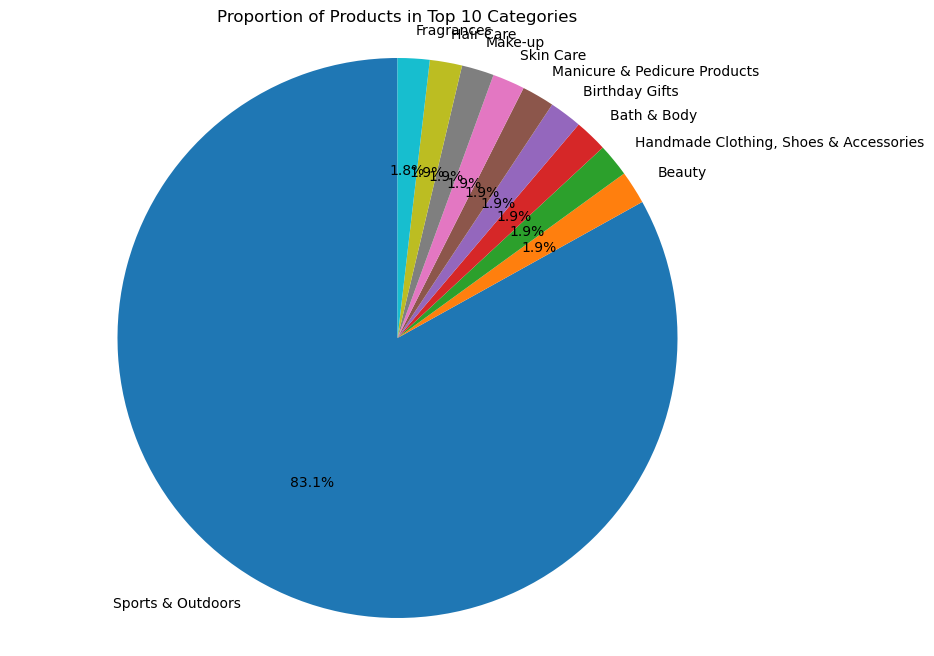

In [22]:
top10 = df['category'].value_counts().head(10)
proportions = top10 / top10.sum() * 100  # Convert to percentages

plt.figure(figsize=(10, 8))
plt.pie(proportions.values, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Products in Top 10 Categories')
plt.axis('equal')  
plt.show()

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [23]:
# 1.1 Calculate the mean, median, and mode for the price of products

In [24]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(np.float64(89.24380943923663), 19.09, np.float64(9.99))

In [25]:
# 1.2 What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [26]:
# The average price of the products listed is 89,24 and it's very higher comparing to the most common price of 9.99. 

In [27]:
# 2.1 Determine the variance, standard deviation, range, and interquartile range for product price.

In [28]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [29]:
# 2.2 How varied are the product prices? Are there any indicators of a significant spread in prices?

# One of indicators is that the range, from min 0 to max 100000.0 sets the range to max. The indicators says that the prices are extremely varied, with large spread in the data. 
# The variance is very large (119445.48), so the prices dispersed around the mean.
# Standard deviation (345.60) indicate extreme variability because of very high prices in in some itens. 
# The quartiles indicate that most products are relatively low price.  
# This spread could indicate that there's outliers in the prices- 

In [30]:
# 3.1 Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.
# If its hard to read these diagrams, think why this is, and explain how it could be solved..

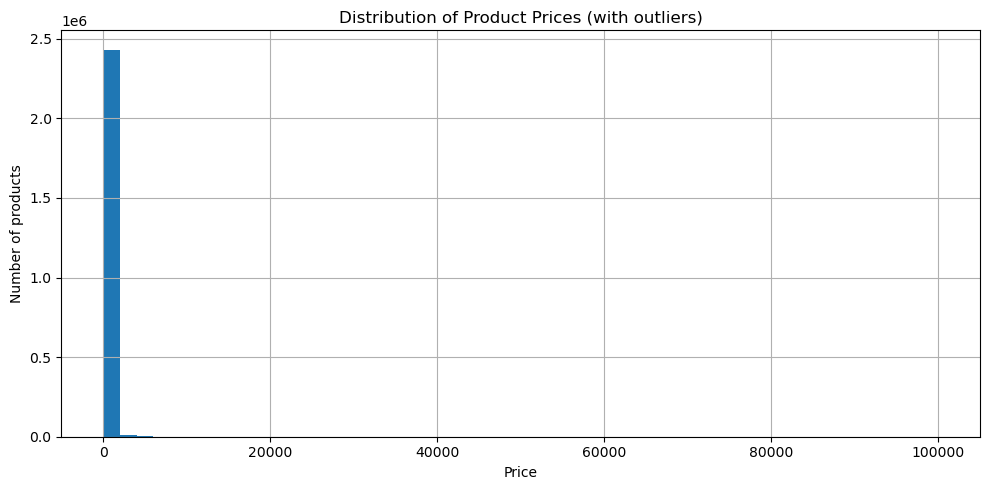

In [32]:
plt.figure(figsize=(10, 5))
df['price'].hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Number of products')
plt.title('Distribution of Product Prices (with outliers)')
plt.tight_layout()
plt.show()

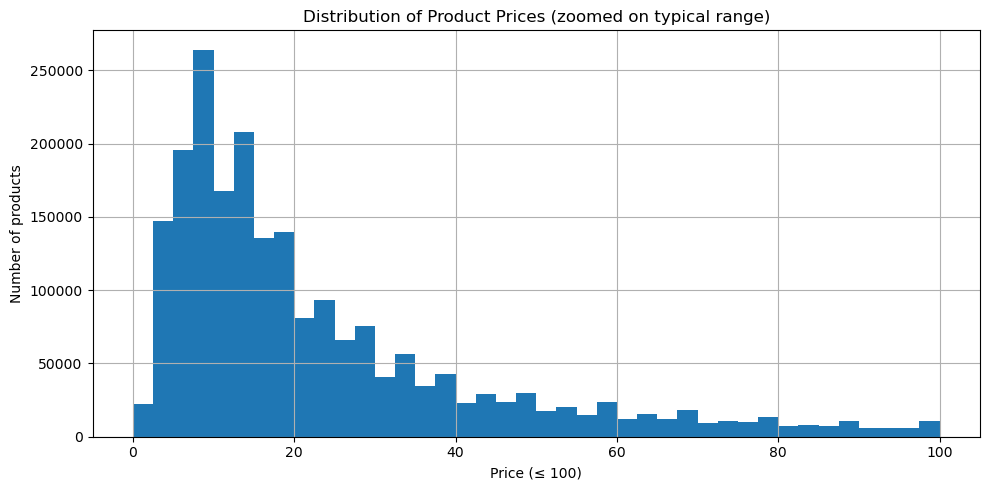

In [33]:
plt.figure(figsize=(10, 5))
df[df['price'] <= 100]['price'].hist(bins=40)
plt.xlabel('Price (≤ 100)')
plt.ylabel('Number of products')
plt.title('Distribution of Product Prices (zoomed on typical range)')
plt.tight_layout()
plt.show()

In [ ]:
# There is a big outlier up as the bar corresponds to the price range where most products lie. 

In [ ]:
#3.2 Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread
# and potential outliers in product pricing.


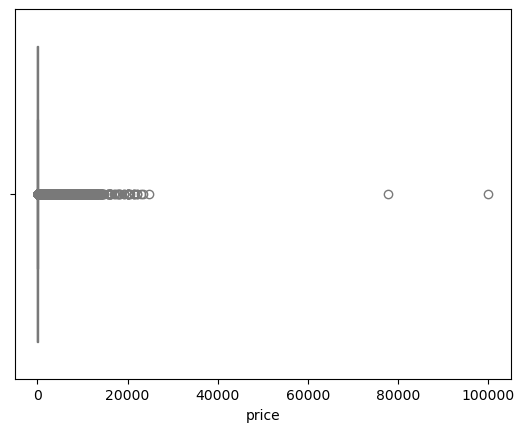

In [35]:
sns.boxplot(x = df['price'], color="lightblue");

In [ ]:
# Yes, there is two big outliers, around 80000 and 100000 that are significantly higher than the rest. 

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
#1.1 Calculate the mean, median, and mode for the rating of products

In [36]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price

(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [ ]:
#1.2 How do customers generally rate products? Is there a common trend?

In [39]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

<Axes: xlabel='stars'>

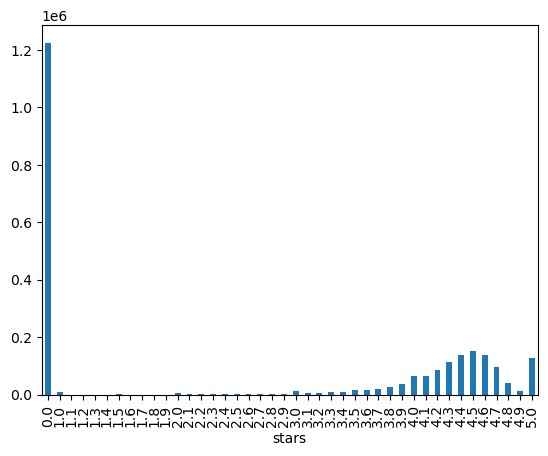

In [40]:
df['stars'].value_counts().sort_index().plot(kind='bar')


In [ ]:
#As the graphic shows, we have a polarising ratings, with many rated 0 or even unrated. If we ignore the 0, we have
# a group with high ratings with most in 4.5, followed by 4.4 and 4.6. 

In [ ]:
#2.1 Determine the variance, standard deviation, and interquartile range for product rating

In [41]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [ ]:
#2.1 Are the ratings consistent, or is there a wide variation in customer feedback?
#Yes, there is a wide variation in customer feedback, because the ratings is listed from 0 to 4.5 and 5. There is even a split between 0 and 4.5. 

In [ ]:
#3.1 - Calculate the skewness and kurtosis for the rating column.

In [42]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

In [ ]:
#3.2 Are the ratings normally distributed, or do they lean towards higher or lower values?

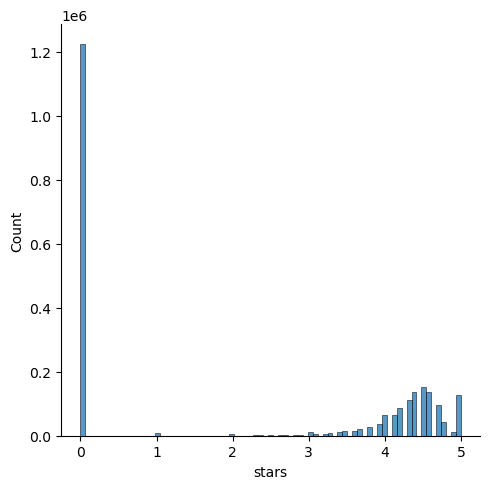

In [43]:
sns.displot(data=df, x='stars');
plt.show()


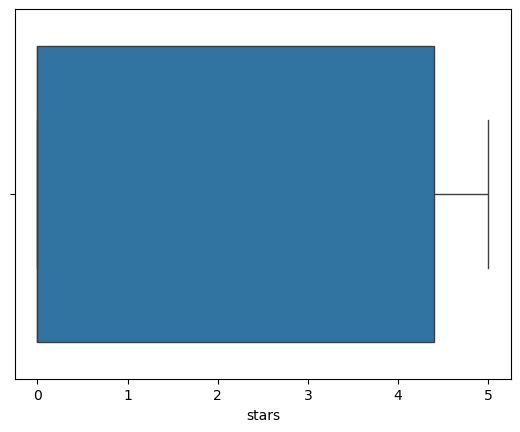

In [44]:
sns.boxplot(data=df, x='stars');
plt.show()

In [ ]:
# The histogram shows that there's a right‑skewed, it means its positively skewed, leaning towards higher values. 



In [ ]:
#4.1 Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


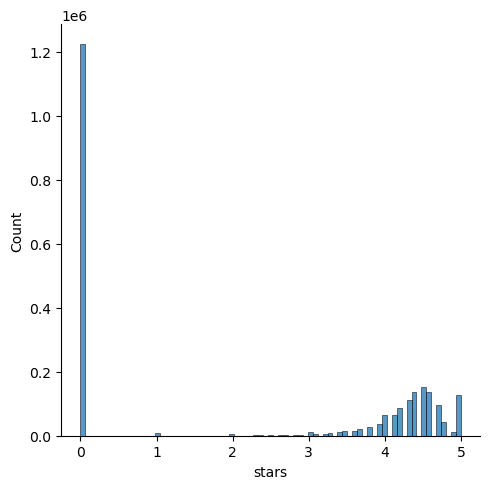

In [45]:
sns.displot(data=df, x='stars');
plt.show()

In [ ]:
# Yes, the rating near 0 it's the more common. 

business-centric report summarizing the findings: 

Sports & Outdoors it´s the most listed product category. 
Most products in the catalog are low‑priced, with three quarters priced below about 46
Customer feedback is highly polarized: many products have a zero score, but those that are rated tend to receive very high scores, often above 4.4 stars



